In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:/Users/internship project/final_food_delivery_dataset.csv")
df.head()

,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


#### 1. Which city has the highest total revenue (total_amount) from Gold members?  

In [3]:
gold_df = df[df["membership"] == "Gold"]
gold_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
8,9,364,7,05-12-2023,953.30,Ruchi Biryani Punjabi,User_364,Chennai,Gold,Restaurant_7,Italian,3.2
11,12,884,423,27-10-2023,1484.65,Royal Tiffins Multicuisine,User_884,Pune,Gold,Restaurant_423,Indian,3.2
13,14,364,112,24-09-2023,898.24,Grand Cafe Punjabi,User_364,Chennai,Gold,Restaurant_112,Chinese,3.2


In [4]:
gold_city_revenue = (
    gold_df
    .groupby("city")["total_amount"]
    .sum()
    .reset_index()
)


In [5]:
gold_city_revenue = gold_city_revenue.sort_values(
    by="total_amount",
    ascending=False
)

gold_city_revenue


,city,total_amount
1,Chennai,1080909.79
3,Pune,1003012.32
0,Bangalore,994702.59
2,Hyderabad,896740.19


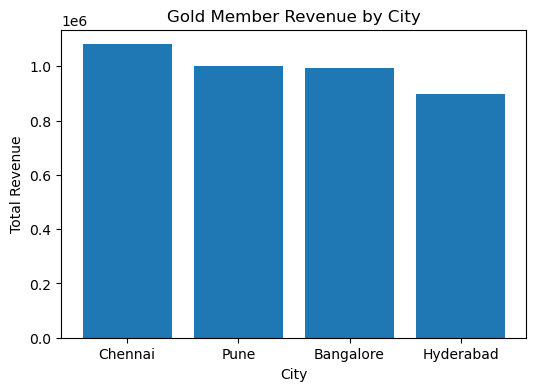

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(
    gold_city_revenue["city"],
    gold_city_revenue["total_amount"]
)
plt.title("Gold Member Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.show()


#### 2. Which cuisine has the highest average order value across all orders?

In [7]:
cuisine_avg_order = (
    df
    .groupby("cuisine")["total_amount"]
    .mean()
    .reset_index()
)


In [8]:
cuisine_avg_order = cuisine_avg_order.sort_values(
    by="total_amount",
    ascending=False
)

cuisine_avg_order


,cuisine,total_amount
3,Mexican,808.021344
2,Italian,799.448578
1,Indian,798.466011
0,Chinese,798.389020


#### 3. How many distinct users placed orders worth more than ₹1000 in total (sum of all their orders)?

In [9]:
user_total_spend = (
    df
    .groupby("user_id")["total_amount"]
    .sum()
    .reset_index()
)


In [10]:
high_value_users = user_total_spend[
    user_total_spend["total_amount"] > 1000
]


In [11]:
high_value_users_count = high_value_users["user_id"].nunique()
high_value_users_count


2544

#### 4. Which restaurant rating range generated the highest total revenue?

In [12]:

bins = [3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0–3.5", "3.6–4.0", "4.1–4.5", "4.6–5.0"]

df["rating_range"] = pd.cut(
    df["rating"],
    bins=bins,
    labels=labels,
    include_lowest=True
)


In [13]:
rating_revenue = (
    df
    .groupby("rating_range")["total_amount"]
    .sum()
    .reset_index()
)


C:\Users\ADEEBSAYEED\AppData\Local\Temp\ipykernel_21660\2359970933.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("rating_range")["total_amount"]


In [14]:
rating_revenue = rating_revenue.sort_values(
    by="total_amount",
    ascending=False
)

rating_revenue


,rating_range,total_amount
3,4.6–5.0,2197030.75
0,3.0–3.5,2136772.70
2,4.1–4.5,1960326.26
1,3.6–4.0,1717494.41


#### 5. Among Gold members, which city has the highest average order value?

In [15]:
gold_df = df[df["membership"] == "Gold"]
gold_city_avg = (
    gold_df
    .groupby("city")["total_amount"]
    .mean()
    .reset_index()
)


In [16]:
gold_city_avg = gold_city_avg.sort_values(
    by="total_amount",
    ascending=False
)

gold_city_avg


,city,total_amount
1,Chennai,808.459080
2,Hyderabad,806.421034
0,Bangalore,793.223756
3,Pune,781.162243


#### 6. Which cuisine has the lowest number of distinct restaurants but still contributes significant revenue?

In [17]:
cuisine_restaurants = (
    df
    .groupby("cuisine")["restaurant_id"]
    .nunique()
    .reset_index(name="restaurant_count")
)


In [18]:
cuisine_revenue = (
    df
    .groupby("cuisine")["total_amount"]
    .sum()
    .reset_index(name="total_revenue")
)


In [19]:
cuisine_analysis = pd.merge(
    cuisine_restaurants,
    cuisine_revenue,
    on="cuisine"
)


In [20]:
cuisine_analysis = cuisine_analysis.sort_values(
    by="restaurant_count",
    ascending=True
)

cuisine_analysis


,cuisine,restaurant_count,total_revenue
0,Chinese,120,1930504.65
1,Indian,126,1971412.58
2,Italian,126,2024203.80
3,Mexican,128,2085503.09


#### 7. What percentage of total orders were placed by Gold members? (Rounded to nearest integer)

In [21]:
total_orders = df.shape[0]
total_orders


10000

In [22]:
gold_orders = df[df["membership"] == "Gold"].shape[0]
gold_orders


4987

In [23]:
gold_percentage = (gold_orders / total_orders) * 100
round(gold_percentage)


50

#### 8. Which restaurant has the highest average order value but less than 20 total orders?

In [24]:
restaurant_orders = (
    df
    .groupby("restaurant_name_x")
    .agg(
        order_count=("order_id", "count"),
        avg_order_value=("total_amount", "mean")
    )
    .reset_index()
)


In [25]:
small_restaurants = restaurant_orders[
    restaurant_orders["order_count"] < 20
]


In [26]:
top_restaurant = small_restaurants.sort_values(
    by="avg_order_value",
    ascending=False
)

top_restaurant.head()


,restaurant_name_x,order_count,avg_order_value
173,Hotel Dhaba Multicuisine,13,1040.222308
354,Sri Mess Punjabi,12,1029.180833
236,Ruchi Biryani Punjabi,16,1002.140625
343,Sri Delights Pure Veg,18,989.467222
88,Classic Kitchen Family Restaurant,19,973.167895


#### 9. Which combination contributes the highest revenue?

In [27]:
combo_revenue = (
    df
    .groupby(["membership", "cuisine"])["total_amount"]
    .sum()
    .reset_index()
)


In [28]:
combo_revenue = combo_revenue.sort_values(
    by="total_amount",
    ascending=False
)

combo_revenue


,membership,cuisine,total_amount
7,Regular,Mexican,1072943.30
6,Regular,Italian,1018424.75
3,Gold,Mexican,1012559.79
2,Gold,Italian,1005779.05
5,Regular,Indian,992100.27
1,Gold,Indian,979312.31
0,Gold,Chinese,977713.74
4,Regular,Chinese,952790.91


#### 10. During which quarter of the year is the total revenue highest?

In [29]:
df["order_date"] = pd.to_datetime(
    df["order_date"],
    dayfirst=True
)


In [30]:
df["quarter"] = df["order_date"].dt.to_period("Q")
quarter_revenue = (
    df
    .groupby("quarter")["total_amount"]
    .sum()
    .reset_index()
)


In [31]:
quarter_revenue = quarter_revenue.sort_values(
    by="total_amount",
    ascending=False
)

quarter_revenue


,quarter,total_amount
2,2023Q3,2037385.10
3,2023Q4,2018263.66
0,2023Q1,1993425.14
1,2023Q2,1945348.72
4,2024Q1,17201.50


#### 11. How many total orders were placed by users with Gold membership?


In [32]:
gold_orders_count = df[df["membership"] == "Gold"].shape[0]
gold_orders_count


4987

In [33]:
df["membership"].value_counts()


membership
Regular    5013
Gold       4987
Name: count, dtype: int64

#### 12. How many distinct users placed at least one order?

In [34]:
distinct_users = df["user_id"].nunique()
distinct_users


2883

#### 13. What is the average order value (rounded to 2 decimals) for Gold members?

In [35]:
gold_avg_order_value = (
    df[df["membership"] == "Gold"]["total_amount"]
    .mean()
)

round(gold_avg_order_value, 2)


797.15

#### 14. How many orders were placed for restaurants with rating ≥ 4.5?


In [36]:
high_rating_orders = df[df["rating"] >= 4.5].shape[0]
high_rating_orders


3374

#### 15. How many orders were placed in the top revenue city among Gold members only?

In [37]:
gold_df = df[df["membership"] == "Gold"]


In [38]:
gold_city_revenue = (
    gold_df
    .groupby("city")["total_amount"]
    .sum()
    .reset_index()
    .sort_values("total_amount", ascending=False)
)

gold_city_revenue


,city,total_amount
1,Chennai,1080909.79
3,Pune,1003012.32
0,Bangalore,994702.59
2,Hyderabad,896740.19


In [39]:
top_city = gold_city_revenue.iloc[0]["city"]
top_city


'Chennai'

In [40]:
orders_in_top_city = gold_df[gold_df["city"] == top_city].shape[0]
orders_in_top_city


1337